In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [59]:
# 시그모이드 함수
def sigmoid(a):
    y = 1/(1+np.exp(-a))
    return y

In [60]:
data=pd.read_csv('train.csv',parse_dates=['file','label','str'])

In [61]:
num_train = np.shape(data)[0]
print('train datase is : ' + str(num_train))

train datase is : 600


In [62]:
for i in range(0,num_train):
    im = Image.open(data.file[i]+".jpg")
    im = im.resize((100,100))
    im.save(data.file[i] + ".png")

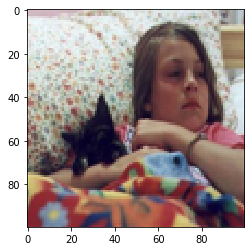

In [64]:
im = Image.open(data.file[5]+".png")
plt.imshow(im)
num_px =np.shape(im)[0]*np.shape(im)[1]*np.shape(im)[2]

In [65]:
X = np.zeros((num_px,num_train))
Y = np.zeros((1,num_train))

for i in range(0,num_train):
    im = Image.open(data.file[i] + ".png")
    im = np.asarray(im)
    im = im.reshape(-1)
    X[:,i] = im
    Y[:,i] = data.label[i]

X = X/255.

In [21]:
W = np.zeros((num_px,1))
B = 0
Y_hat = np.zeros((1,num_train))
predict = np.zeros((1,num_train))

iter = 2000
for i in range(0,iter):
    
    Y_hat = sigmoid(np.dot(W.T, X)+B)
    
    dW = 1/num_train*np.dot(X,(Y_hat-Y).T)
    dB = 1/num_train*np.sum(Y_hat-Y,axis=1)
    
    learning_rate = 0.005
    W = W-learning_rate*dW
    B = B-learning_rate*dB
    
    if i%(iter/5) ==0:
        cost = -np.sum(Y*np.log(Y_hat)+(1-Y)*np.log(1-Y_hat))/num_train
        print('cost : '+str(cost)+'\t -> ('+str(i)+' iter)')
cost = -np.sum(Y*np.log(Y_hat)+(1-Y)*np.log(1-Y_hat))/num_train
print('cost : ' + str(cost) + '\t-> ('+str(i) +" iter)")


cost : 0.6931471805599453	 -> (0 iter)
cost : 2.1088490587590383	 -> (400 iter)
cost : 1.6377032576979396	 -> (800 iter)
cost : 1.3088566253978968	 -> (1200 iter)
cost : 1.0141591399832073	 -> (1600 iter)
cost : 0.25480510168253667	-> (1999 iter)


In [66]:
for i in range(0,num_train):
    if Y_hat[0,i] >0.5:
        predict[0,i] = 1
    else:
        predict[0,i] = 0
print('train accuracy : {} %'.format(100 - np.mean(np.abs(predict - Y))*100))

train accuracy : 89.83333333333333 %


In [68]:
data_test=pd.read_csv('test.csv',parse_dates=['file','label','str'])
num_test = np.shape(data_test)[0]

for i in range(0,num_test):
    im = Image.open(data_test.file[i]+".jpg")
    im = im.resize((100,100))
    im.save(data_test.file[i]+".png")
    
X_test = np.zeros((num_px,num_test))
Y_test = np.zeros((1,num_test))
    
for i in range(0,num_test):
    im = Image.open(data_test.file[i]+".png")
    im= np.asarray(im)
    im = im.reshape(-1)
    X_test[:,i] = im
    Y_test[:i] = data_test.label[i]
X_test = X_test/255.
    
    
    
    
predict_test = np.zeros((1,num_test))
Y_hat_test = sigmoid(np.dot(W.T,X_test)+B)

for i in range(0,num_test):
    if Y_hat_test[0,i]>0.5:
        predict_test[0,i] =1
    else :
        predict_test[0,i] =0

print("test accuracy: {} %".format(100-np.mean(np.abs(predict_test - Y_test))*100))

test accuracy: 44.49999999999999 %


predict : cat
real    : dog


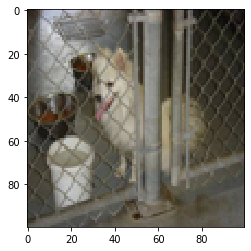

In [71]:
index = 351
img = Image.open(data_test.file[index]+".png")
A = np.asarray(img)
A = A.reshape(-1)
A_label = data_test.label[index]
A = A/255.

A_test_hat = sigmoid(np.dot(W.T,A)+B)

if A_test_hat>0.5:
     A_predict = "dog"
else :
    A_predict ="cat"

print('predict : '+A_predict + '\nreal    : '+str(data_test.str[index]))
plt.imshow(img)